## AND perceptron

In [1]:
import pandas as pd

In [6]:
weight1 = 0.5
weight2 = 0.5
bias = -1.0

test_inputs = [(0, 0), (0, 1), (1, 0), (1, 1)]
correct_outputs = [False, False, False, True]
outputs = []

for test_input, correct_output in zip(test_inputs, correct_outputs):
    linear_combination = weight1 * test_input[0] + weight2 * test_input[1] + bias
    output = int(linear_combination >= 0)
    is_correct = 'Yes' if output == correct_output else 'No'
    outputs.append([test_input[0], test_input[1], linear_combination, output, is_correct])

num_wrong = len(list(filter(lambda x: x[4]=='No', outputs)))
output_frame = pd.DataFrame(outputs, columns = ['Input 1', 'Input 2', 'Linear Combination', 'Activation Output', 'Is Correct'])
if not num_wrong:
    print('All correct\n')
else:
    print('You goet {} wrong.\n'.format(num_wrong))
print(output_frame.to_string(index=False))

All correct

 Input 1  Input 2  Linear Combination  Activation Output Is Correct
       0        0                -1.0                  0        Yes
       0        1                -0.5                  0        Yes
       1        0                -0.5                  0        Yes
       1        1                 0.0                  1        Yes


## OR perceptron

In [8]:
weight1 = 0.5
weight2 = 0.5
bias = -0.5

test_inputs = [(0, 0), (0, 1), (1, 0), (1, 1)]
correct_outputs = [False, True, True, True]
outputs = []

for test_input, correct_output in zip(test_inputs, correct_outputs):
    linear_combination = weight1 * test_input[0] + weight2 * test_input[1] + bias
    output = int(linear_combination >= 0)
    is_correct = 'Yes' if output == correct_output else 'No'
    outputs.append([test_input[0], test_input[1], linear_combination, output, is_correct])

num_wrong = len(list(filter(lambda x: x[4]=='No', outputs)))
output_frame = pd.DataFrame(outputs, columns = ['Input 1', 'Input 2', 'Linear Combination', 'Activation Output', 'Is Correct'])
if not num_wrong:
    print('All correct\n')
else:
    print('You goet {} wrong.\n'.format(num_wrong))
print(output_frame.to_string(index=False))

All correct

 Input 1  Input 2  Linear Combination  Activation Output Is Correct
       0        0                -0.5                  0        Yes
       0        1                 0.0                  1        Yes
       1        0                 0.0                  1        Yes
       1        1                 0.5                  1        Yes


## NOT perceptron

In [11]:
weight1 = -1.0
weight2 = 0.0
bias = 0.0

# only first input is considered 1 -> 0, and 0 -> 1
test_inputs = [(0, 0), (0, 1), (1, 0), (1, 1)]
correct_outputs = [True, True, False, False]
outputs = []

for test_input, correct_output in zip(test_inputs, correct_outputs):
    linear_combination = weight1 * test_input[0] + weight2 * test_input[1] + bias
    output = int(linear_combination >= 0)
    is_correct = 'Yes' if output == correct_output else 'No'
    outputs.append([test_input[0], test_input[1], linear_combination, output, is_correct])

num_wrong = len(list(filter(lambda x: x[4]=='No', outputs)))
output_frame = pd.DataFrame(outputs, columns = ['Input 1', 'Input 2', 'Linear Combination', 'Activation Output', 'Is Correct'])
if not num_wrong:
    print('All correct\n')
else:
    print('You goet {} wrong.\n'.format(num_wrong))
print(output_frame.to_string(index=False))

All correct

 Input 1  Input 2  Linear Combination  Activation Output Is Correct
       0        0                 0.0                  1        Yes
       0        1                 0.0                  1        Yes
       1        0                -1.0                  0        Yes
       1        1                -1.0                  0        Yes


## XOR

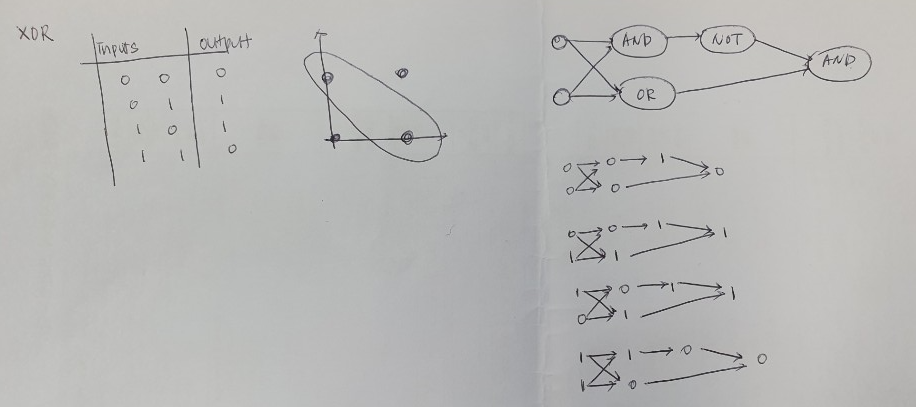

In [13]:
from IPython.display import Image
Image(filename="files/xor.png")

## Perceptron Algorithm  

In [18]:
# 1) start with random weights (w1,.. wn, b)  
# 2) for every misclassified point (x1, .. xn):  
#     if prediction == 0:  
#             for i = 1...n  
#                 change wi + axi  
#             change b to b+a  
#     if prediction == 1:  
#             for i = 1...n  
#                 change wi - axi  
#             change b to b-a  

In [15]:
import numpy as np
np.random.seed(2019)

In [16]:
def step_function(t):
    if t >= 0:
        return 1
    return 0

def prediction(X, W, b):
    return step_function((np.matmul(X, W)+b)[0])

In [62]:
def perceptron_step(X, y, W, b, learn_rate = 0.01):
    for x in range(len(X)):
        predicted = prediction(X[x], W, b)
        
        if predicted != y[x]:
            if predicted == 0:
                W[0] = W[0] + learn_rate * X[x][0]
                W[1] = W[1] + learn_rate * X[x][1]
                b += learn_rate
            else:
                W[0] = W[0] - learn_rate * X[x][0]
                W[1] = W[1] - learn_rate * X[x][1]
                b -= learn_rate
    return W, b

In [63]:
def train_perceptron_algorithm(X, y, learn_rate = 0.01, num_epochs = 25):
    x_min, x_max = min(X.T[0]), max(X.T[0])
    y_min, y_max = min(X.T[1]), max(X.T[1])
    W =np.array(np.random.rand(2, 1))
    b = np.random.rand(1)[0] + x_max
    
    boundary_lines = []
    for i in range(num_epochs):
        W, b = perceptron_step(X, y, W, b, learn_rate)
        boundary_lines.append((-W[0]/W[1], -b/W[1]))
        
    return boundary_lines

In [64]:
data = pd.read_csv('./files/data.csv')
data.columns = ['x1', 'x2', 'y']
data.head()

,x1,x2,y
0,0.28774,0.29139,1
1,0.40714,0.17878,1
2,0.29230,0.42170,1
3,0.50922,0.35256,1
4,0.27785,0.10802,1


In [65]:
train_perceptron_algorithm(data[['x1', 'x2']].values, data.y.values)

[(array([-0.9452185]), array([-2.02595799])),
 (array([-0.8933494]), array([-2.87707893])),
 (array([-1.18670679]), array([1.93662775])),
 (array([-1.10189404]), array([1.0136559])),
 (array([-1.04739086]), array([0.89488924])),
 (array([-0.99849613]), array([0.87672714])),
 (array([-0.9515466]), array([0.85928759])),
 (array([-0.90642845]), array([0.84252831])),
 (array([-0.86303657]), array([0.82641026])),
 (array([-0.82127375]), array([0.81089733])),
 (array([-0.78104994]), array([0.79595607])),
 (array([-0.7422816]), array([0.78155545])),
 (array([-0.71930587]), array([0.77541935])),
 (array([-0.69385857]), array([0.76949736])),
 (array([-0.68190963]), array([0.76626433])),
 (array([-0.70608521]), array([0.7774413])),
 (array([-0.69396154]), array([0.77414131])),
 (array([-0.71856694]), array([0.78555097])),
 (array([-0.70626381]), array([0.78218193])),
 (array([-0.73131181]), array([0.79383161])),
 (array([-0.71882432]), array([0.79039132])),
 (array([-0.74432823]), array([0.80228

##  Error Function

- discrete
- continues : to use Gradient Descent
    - need continuous prediction : Activation function from step function to sigmoid function (Probability)

## Sigmoid function

In [67]:
def sigmoid(X):
     return 1/(1+np.exp(-X))

In [68]:
test_cases = [(1, 1), (2, 4), (5, -5), (-4, 5)]

for t in test_cases:
    print(sigmoid(4*t[0] + 5*t[1] - 9))

0.5
0.9999999943972036
8.315280276641321e-07
0.5


## Softmax

- exponential function always returns positive numbers -> 1 / (1+2+0) -> e^2 /(e^2+e^1+e^0)

In [75]:
def softmax(L):
    return np.exp(L) / np.sum(np.exp(L))

In [74]:
np.exp([5,6,7])

array([ 148.4131591 ,  403.42879349, 1096.63315843])

In [76]:
softmax([5, 6, 7])

array([0.09003057, 0.24472847, 0.66524096])

## One-hot encoding

- duck 1 0 0 
- beaver 0 1 0
- bear 0 0 1

## Maximum likelihood

- probabilities of blue(0.6), blue(0.2), red(0.1), red(0.7) => 0.6*0.2*0.1*0.7 = 0.0084
- probabilities of blue(0.7), blue(0.9), red(0.8), red(0.6) => 0.7*0.9*0.8*0.6 = 0.3023
- probability of each point being the color it is according to the model. => get the probability of the whole arrangement

-> maximize the probability

-> turn product to sum : log(ab) = log(a) + log(b)

-> log(0) ~ log(1) < 0

-> ln(0.6) + ln(0.2) + ln(0.1) + ln(0.7) = negative -> -log로

-> sum(-log...) = cross entropy

-log(0.6)-log(0.2)-log(0.1)-log(0.7) = 4.8 = points incorrectly classified have larger values.  
-log(0.7)-log(0.9)-log(0.8)-log(0.6) = 1.2 = points correctly classified have smaller values.

-> goal is to minimize cross entropy

## Cross Entropy

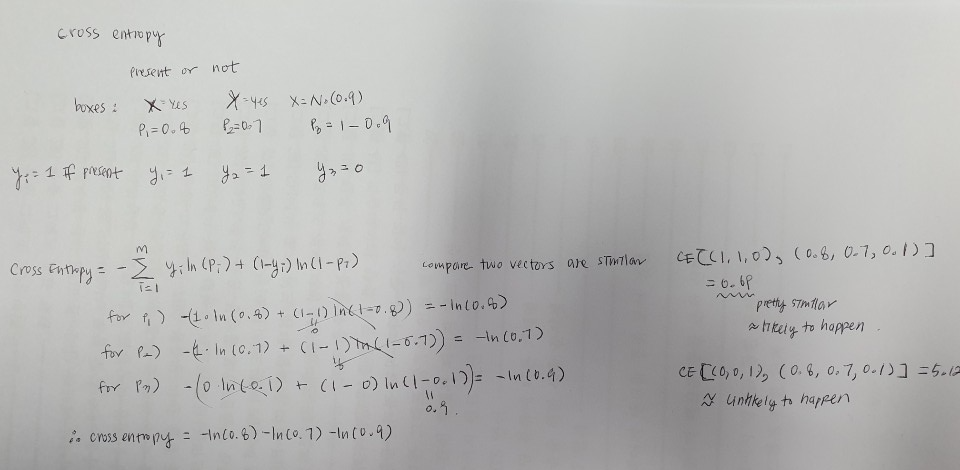

In [77]:
Image(filename="files/cross_ent.png")

In [81]:
def cross_entropy(Y, P):
    y = np.array(Y)
    p = np.array(P)
    return -np.sum(y*np.log(p) + (1-y)*np.log(1-p))

In [82]:
cross_entropy([1, 1, 0], [0.8, 0.7, 0.1])

0.6851790109107685

In [83]:
cross_entropy([0, 0, 1], [0.8, 0.7, 0.1])

5.115995809754082

In [84]:
cross_entropy([1,0,1,1], [0.4,0.6,0.1,0.5])

4.828313737302301

## Multiclass Cross Entropy

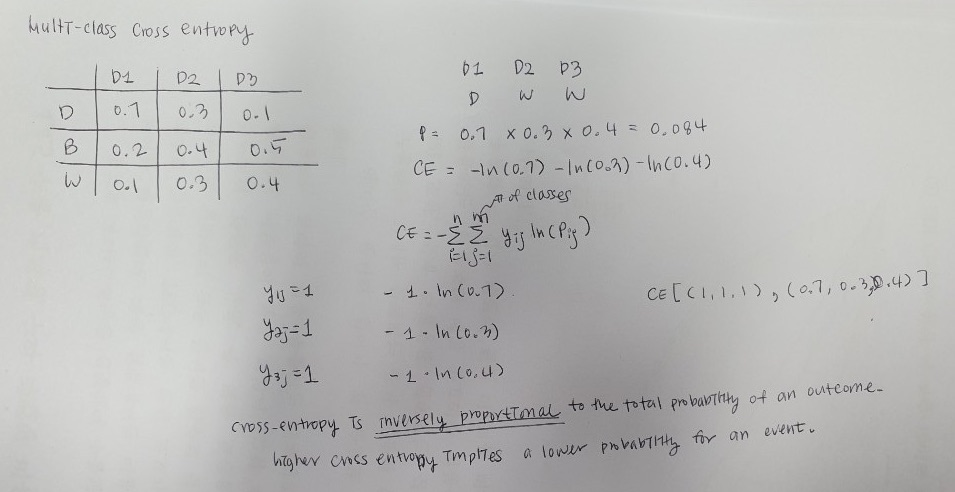

In [88]:
Image(filename="files/multiclass_cross_ent.jpg")